In [1]:
##########################################################
#  Python script template for Question 1 (IAML Level 11)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.



In [2]:
import os
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from iaml01cw2_helpers import *
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Sss")
print("Version:", sklearn.__version__)

/Users/jishenshen/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


Sss
Version: 0.19.1


## Q1

In [3]:
# Load data

In [4]:
data_path = os.path.join(os.getcwd(), 'data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST('../q1_data')
# Xtrn

In [5]:
# print(Ytrn)
#

In [6]:
# print(Xtst)
#

In [7]:
# print(Ytst)

In [8]:
# Data preprocessing


# Step 1 Make backup of Xtrn and Xtst

Xtrn_orig = Xtrn.copy()
# Xtrn_orig


Xtst_orig = Xtst.copy()
# Xtst_orig

# Step 2 Divide Xtrn and Xtst by 255.0


Xtrn = Xtrn/255.0


Xtst = Xtst/255.0

# Step 3 Calculate the mean value of Xtrn for each dimension


Xmean = Xtrn.mean(axis=0)


# Xmean.shape


# Xtrn.shape


# Xtst.shape


# Step 4 Substract Xmean fron each row of Xtrn and Xtst

Xtrn_nm = Xtrn - Xmean

Xtst_nm = Xtst - Xmean

# Xtst_nm.shape

### 1.1

In [9]:
# Frist 4 elements in 

In [10]:
Xtrn_nm[0,:4]

array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04])

In [11]:
Xtrn_nm[-1,:4]

array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04])

### 1.2

In [12]:
fullTrn = np.column_stack((Xtrn_orig, Ytrn))


In [13]:
fullDf = pd.DataFrame.from_records(fullTrn)


In [14]:
classZero = fullDf[fullDf[fullDf.columns[-1]]==0]
c0Mean = classZero.mean(axis=0)

In [15]:
classOne = fullDf[fullDf[fullDf.columns[-1]]==1]
c1Mean = classOne.mean(axis=0)

In [16]:
classTwo = fullDf[fullDf[fullDf.columns[-1]]==2]
c2Mean = classTwo.mean(axis=0)

In [17]:
classThree = fullDf[fullDf[fullDf.columns[-1]]==3]
c3Mean = classThree.mean(axis=0)
c3Mean.shape


(785,)

In [18]:
# Compute the mean of each class
def computeClassMean(data):
    classNumber = 10
    classMeanArray = []
    for i in range(0,classNumber):
        # Classify the data, group by the last column (Y) value of each samples
        classSample = data[data[data.columns[-1]] == i]
        classMean = classSample.mean(axis=0)
        classMeanArray.append(classMean)
    return classMeanArray

# Find the four required samples
def findSamples(data, mean):
    """find the two closest samples and two furthest samples of the `data` class to the mean vector of that class."""

    # Compute the distance between the first sample of each class and c0Mean
    firstSample = data.iloc[0]
    firstDist = np.linalg.norm(mean-firstSample)

    # Initialise the closest sample using the first sample
    closestSample = firstSample
    closestDist = firstDist

    # Initialise the second closest sample using the first sample
    secondClosestSample = firstSample
    secondClosestDist = firstDist

    # Initialise the furthest sample using the first sample
    furthestSample = firstSample
    furthestDist = firstDist

    # Initialise the second furthest sample using the first sample
    secondFurthestSample = firstSample
    secondFurthestDist = firstDist

    # Compute the distance between samples and c0Mean, start from index 1 (the first sample excluded)
    for i in range(1, len(data)):

        comparedSample = data.iloc[i]
        distance = np.linalg.norm(mean-comparedSample)

        if distance < closestDist:
            secondClosestSample = closestSample
            secondClosestDist = closestDist
            closestSample = comparedSample
            closestDist = distance

        elif closestDist <= distance <= secondClosestDist:
            secondClosestSample = comparedSample
            secondClosestDist = distance

        elif distance > furthestDist:
            secondFurthestSample = furthestSample
            secondFurthestDist = furthestDist
            furthestSample = comparedSample
            furthestDist = distance

        elif secondFurthestDist <= distance <= furthestDist:
            secondFurthestSample = comparedSample
            secondFurthestDist = distance

    return closestSample, secondClosestSample, secondFurthestSample, furthestSample

# Find all samples for each class
def findAllSamples():
    fullTrn = np.column_stack((Xtrn_orig, Ytrn))
    fullDf = pd.DataFrame.from_records(fullTrn)
    classMeanArray = computeClassMean(fullDf)
    selectedSamples = []

    for i in range (0,10):
        classSamples = fullDf[fullDf[fullDf.columns[-1]] == i]
        classMean = classMeanArray[i]
        result = findSamples(classSamples, classMean)
        for row in result:
            del row[784]
        selectedSamples.append(result)

    return selectedSamples


In [19]:
fullTrn = np.column_stack((Xtrn_orig, Ytrn))
fullDf = pd.DataFrame.from_records(fullTrn)
everyClass=fullDf[fullDf[fullDf.columns[-1]] == 0]
mean=computeClassMean(fullDf)[0]
findSamples(everyClass,mean)

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 5        1.0
 6        0.0
 7        0.0
 8        0.0
 9        0.0
 10      78.0
 11     154.0
 12      34.0
 13       0.0
 14       0.0
 15       0.0
 16      76.0
 17     104.0
 18       0.0
 19       0.0
 20       0.0
 21       0.0
 22       0.0
 23       0.0
 24       0.0
 25       0.0
 26       0.0
 27       0.0
 28       0.0
 29       0.0
        ...  
 755      0.0
 756      0.0
 757      0.0
 758      0.0
 759      0.0
 760      1.0
 761      0.0
 762      0.0
 763     56.0
 764     74.0
 765     90.0
 766     82.0
 767     78.0
 768     85.0
 769     93.0
 770     93.0
 771     93.0
 772     92.0
 773     93.0
 774     85.0
 775     66.0
 776     85.0
 777     32.0
 778      0.0
 779      2.0
 780      0.0
 781      0.0
 782      0.0
 783      0.0
 784      0.0
 Name: 59933, Length: 785, dtype: float64,
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 5        0.0
 6        0.0
 7   

In [20]:
# Get all closest, second closest, second furthest, and furthest samples
data = findAllSamples()

# Get all class mean vector
classMeanArray = computeClassMean(fullDf)
for row in classMeanArray:
    del row[784]


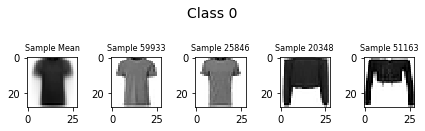

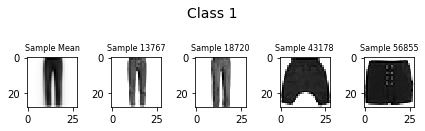

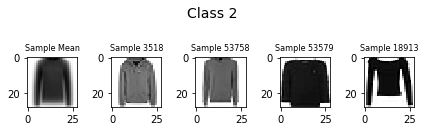

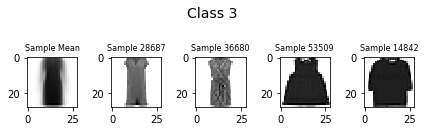

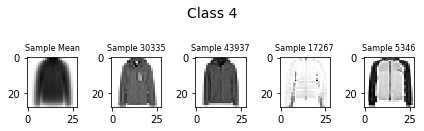

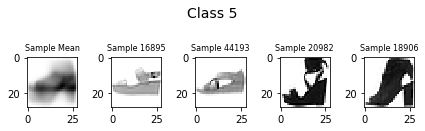

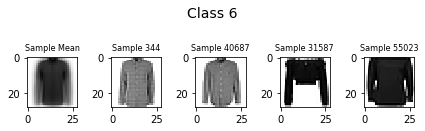

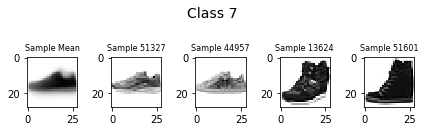

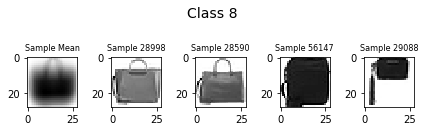

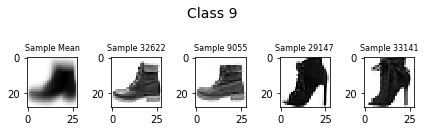

In [39]:
# Combine all samples and display images
for rowIndex in range(len(data)):
    fig, ax = plt.subplots(1,5)
    rowData = data[rowIndex]
    rowData = (classMeanArray[rowIndex],)+rowData
    plt.suptitle('Class {}'.format(rowIndex), fontsize=14)
    for index, sample in enumerate(rowData):
        sampleName = sample.name
        imageData = sample.values.reshape((28,28))
        ax[index].imshow(imageData, cmap='gray_r')
        if sampleName == None:
            sampleName = 'Mean'
        ax[index].set_title('Sample {}'.format(sampleName),fontsize=8)

    plt.tight_layout()
    plt.subplots_adjust(top=1.4)
    
    fig.savefig('./results/q1_2{}.img.png'.format(rowIndex))

plt.show()



### 1.3


In [22]:
pca = PCA(n_components=5)
pca.fit(Xtrn_nm)
print(pca.explained_variance_)
print("Run")

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]
Run


### 1.4


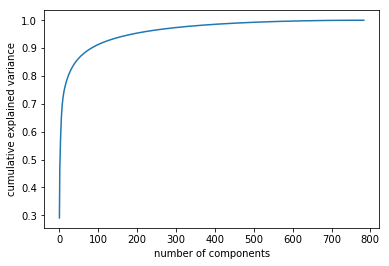

In [23]:
pca = PCA().fit(Xtrn_nm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### 1.5


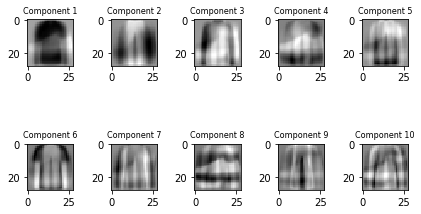

In [24]:
pca = PCA(n_components=10)
pca.fit(Xtrn_nm)

NUM_OF_ROWS = 2
NUM_OF_COLS = 5

fig, ax = plt.subplots(NUM_OF_ROWS,NUM_OF_COLS)
for i in range(NUM_OF_ROWS):
    for j in range(NUM_OF_COLS):
        img = pca.components_[i * NUM_OF_COLS + j].reshape((28,28))
        ax[i, j].imshow(img,cmap='gray_r')
        ax[i, j].set_title('Component {}'.format(i * NUM_OF_COLS + j + 1),fontsize=8)
    plt.tight_layout()
    plt.subplots_adjust(top=1.4)



### 1.6


In [25]:
# Combine Xtrn and Ytrn
fullTrn_nm = np.column_stack((Xtrn_nm, Ytrn))

# Convert to DataFrame
fullTrnNmDf = pd.DataFrame.from_records(fullTrn_nm)


In [26]:
def splitByClass(data):
    "split data by class from 0-9, with y col removed"
    NUM_OF_CLASS = 10
    allClass = []
    for i in range(NUM_OF_CLASS):
        currentClass = data[data[data.columns[-1]] == i]
        cleaned = currentClass.iloc[:,:-1]
        allClass.append(cleaned)
    return allClass


In [27]:
# 思路：用整个dataset去fit，然后transform到每个class,接着提取transform后的每个class的第一个sample，用来计算RMSE

def reconstructSample(pca, pcaProcessedData):
    reconstructedData = pca.inverse_transform(pcaProcessedData)
    reconstructedSample = reconstructedData[0,:]
    return reconstructedSample

def rootMeanSquareError(numOfComponents, classData):
    pca = PCA(n_components=numOfComponents)
    pca.fit(Xtrn_nm)
    pcaProcessedData = pca.transform(classData)
    reconstructed = reconstructSample(pca, pcaProcessedData)
    return sqrt(mean_squared_error(classData.iloc[0], reconstructed))

print("test")

test


In [28]:
K_Array = [5,20,50,200]

for i in range(10):
    currentClass = splitByClass(fullTrnNmDf)[i]
    for k in K_Array:
        result = rootMeanSquareError(k,currentClass)
        print(f"Class {i} with K={k} components: {result}")



Class 0 with K=5 components: 0.2561486645726525
Class 0 with K=20 components: 0.1499541646031784
Class 0 with K=50 components: 0.12746344123866568
Class 0 with K=200 components: 0.05979163173982736
Class 1 with K=5 components: 0.1980243960303777
Class 1 with K=20 components: 0.14054204344476554
Class 1 with K=50 components: 0.09559448969847094
Class 1 with K=200 components: 0.03705990579173491
Class 2 with K=5 components: 0.19870015373792746
Class 2 with K=20 components: 0.14558979186917884
Class 2 with K=50 components: 0.12266096129788197
Class 2 with K=200 components: 0.07983219630694803
Class 3 with K=5 components: 0.14565797854878523
Class 3 with K=20 components: 0.10716921987676835
Class 3 with K=50 components: 0.08374660774342657
Class 3 with K=200 components: 0.05652978813803838
Class 4 with K=5 components: 0.11820870391246154
Class 4 with K=20 components: 0.10261541553858543
Class 4 with K=50 components: 0.0879668148945057
Class 4 with K=200 components: 0.047254787347292077
Cla

### 1.7

X


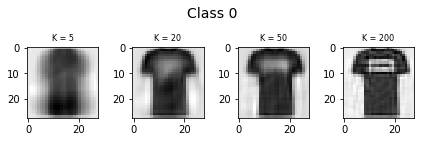

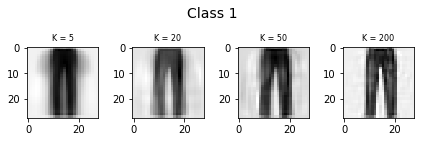

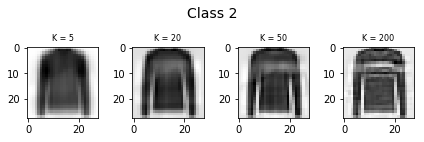

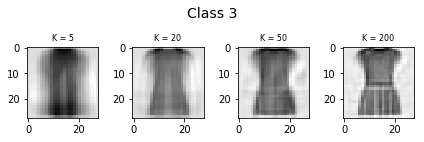

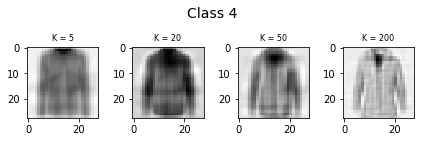

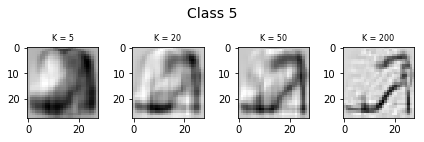

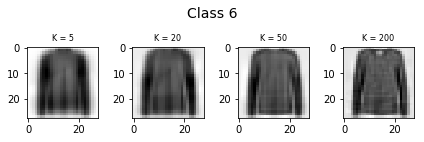

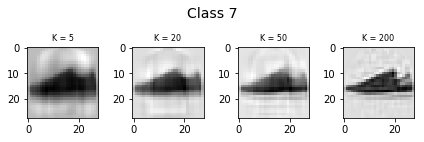

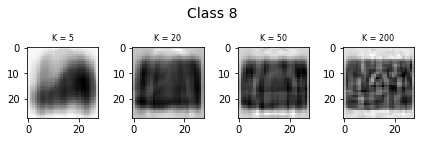

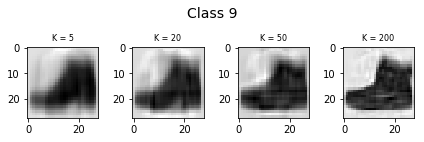

In [29]:
def printReconstructedSamples():
    K_Array = [5,20,50,200]
    classArray = splitByClass(fullTrnNmDf)
    NUM_OF_ROWS = 10
    NUM_OF_COLS = 4

    for i in range(NUM_OF_ROWS):
        fig, ax = plt.subplots(1, NUM_OF_COLS)
        currentClass = classArray[i]
        plt.suptitle(f'Class {i}', fontsize=14)
        for j in range(NUM_OF_COLS):
            pca = PCA(n_components=K_Array[j])
            pca.fit(Xtrn_nm)
            pcaProcessedData = pca.transform(currentClass)
            reconstructedSample = reconstructSample(pca, pcaProcessedData)
            newImg = (reconstructedSample + Xmean).reshape((28,28))
            ax[j].imshow(newImg,cmap='gray_r')
            ax[j].set_title(f"K = {K_Array[j]}",fontsize=8)
        plt.tight_layout()
        plt.subplots_adjust(top=1.4)

print("X")

printReconstructedSamples()

### 1.8


TypeError: You must first set_array for mappable

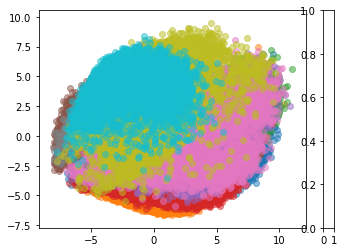

In [30]:
pca = PCA(n_components=2)
X_r = pca.fit(Xtrn_nm).transform(Xtrn_nm)
# colors = ['navy', 'turquoise', 'darkorange','blue','black','yellow','green','red','gray','orange']
plt.figure()
for i in [0,1,2,3,4,5,6,7,8,9]:
    plt.scatter(X_r[Ytrn==i,0],X_r[Ytrn==i,1], alpha=.5,cmap = plt.cm.coolwarm)
plt.colorbar(ticks=range(10), label='Class')
plt.clim(0, 9)
plt.show()
print("dddf")

### 1.9